## **How does Reinforcement Learning work with Q Learning in Frozen Lake?**
I am going to show step by step how Q Learning works on the Frozen Lake environment, I will go in depth and show various aspects of the process. </br>
I will show how things come in to place and what the math behind it does, it seems like a black box at first but it makes more sense once you understand how things progress.

By Alpay Demirci

## What is Reinforcement Learning (RL)?

Reinforcement Learning is a type of machine learning where an **agent** (like a robot or software) learns how to do something by **trying things out and getting feedback**.

-   Think of it like training a dog .\
    You give it a treat when it does something good (like sitting) and no treat when it doesn't.

-   In RL, the agent learns what **actions** to take in different **situations** (called "states") to get the most **reward** over time.

The key parts:

-   **Agent**: The learner or decision maker.

-   **Environment**: Where the agent lives and acts.

-   **Action**: What the agent can do.

-   **State**: The situation the agent is in.

-   **Reward**: The feedback (positive or negative) it gets.

Over time, the agent figures out the best way to act to get the most rewards.

<img src="https://cdn.botpenguin.com/assets/website/Reinforcement_Learning_9684225a7b.png" alt="Diagram of RL process" width="400"> 

### What is Q-Learning?

Q-Learning is a type of reinforcement learning.

-   It helps the agent **learn the value of actions** in different situations, without knowing what the environment is like.

-   The "Q" stands for **quality** -- the "Q-value" is a number that tells the agent **how good it is to take a certain action in a certain state**.

Imagine playing a game:

-   You're somewhere in a room (that's your **state**).

-   You can go left or right (**actions**).

-   Depending on where you go, you might find treasure (positive **reward**) or fall into a trap (negative reward).

-   Q-learning helps you figure out which action in position of the room gives you the best results over time.

-   With Q-learning you make some kind of "cheat sheet" over time to know where to do what, this cheat sheet is called a **Q-table**

<img src="https://www.researchgate.net/publication/339665871/figure/fig1/AS:865163892772866@1583282554642/The-model-of-Q-learning-and-the-structure-of-Q-table.ppm" alt="Diagram of RL process" width="700"> 

### Q-Learning formula

<img src="https://easyai.tech/wp-content/uploads/2022/08/291db-1*jKTX7orlWUeNVOZEDQE9qA.png" alt="Q-learning Formula" width="700"> 

The above image shows the Q-learning Update formula, it updates the Q-Table based on its last actions. </br>
It basically is this: **New Q = Old Q + Learning Rate × (Reward + Discount × Max Future Q - Old Q)**

The parts of this formula are:

**- New Q:** The result of the formula, the New Q value that we are going to assign to the previous state and the action we took from that state.

**- Old Q:** The current Q value of the previous state and the action we took from that state.

**- Learning Rate (or Alpha):** A number that represents the rate of how big of a change our formula is going to make in the new Q value. A very plain example: if we have a learning rate of 0.5 and we get a reward of 1 the new Q value would'nt get the full 1 but just half of it as backpropagation.

**- Reward:** A number representing if the agent did a good or bad thing (or nothing special), if an agent finds a treasure it would get a positive reward, if an agent would just step and achieve nothing it would get no reward, it is also possible to give an agent a negative reward (like a punishment) for falling in something like a trap.

**- Discount (or Gamma):** A number representing how important future rewards are. A low value would mean that the agent is going for quick and fast rewards while not caring much about future rewards. It is litteraly how much value do you give for future rewards. For example: An agent is on a tile right next to the treasure (Q Value is still 0 on his current state and actions).
When he takes action 4 (move right) and lands on the treasure, it gains a reward of 1. With a Discount of 0 the formula would be **New Q = Old Q + Learning Rate × (1 + 0 × Max Future Q - Old Q)** Meaning you would get a lower Q value for the action from that state that led to finding the treasure (1+0 in the formula), but if you had a higher discount you would get (1+1) which gives a higher Q value in the end.</br> What happens when you have an higher discount is that the position not next to the reward, but the position next to that position that's next to the reward would also get a higher Q value. Because it think's: **"Hey, the position next to me has a high Q value, this one might be very close to the treasure"**. It's like a scent that spreads faster when the discount is higher.

**- Max Future Q:**: "The highest Q value for any action in the next state. It’s looking at what the next state offers.

So to summarize, this is kind of what the formula does as a thought: **"Update my guess (Old Q) based on what I just experienced: the immediate reward and what might happen in the future. But don’t change everything at once, update it gradually using the learning rate."**

<img src="https://miro.medium.com/max/682/1*g0rUy9yjg7UNJgUcVRdzvg.jpeg" alt="Q-Table" width="500">  

## Frozen Lake environment

**Frozen Lake** is a popular **grid-based environment** used in reinforcement learning (OpenAI Gym) to test how well an agent can learn to reach a goal safely.


-   It's a grid like 4x4 or 8x8
-   It has holes at some places of the grid
-   The states are the grid tiles and the count up from left to right like below:
-   01 02 03 04
-   05 06 07 08
-   09 10 11 12                                                     
-   01 is the start and 12 is the goal


### The Goal:

Start at **Top Left**, and reach **Bottom Right** without falling into a **hole**.


###  How It Works:

-   You can move: **left, right, up, down**.

-   The ground can be **slippery** if it's turned on, sometimes the agent slips and moves in a different direction than intended (adds randomness).

-   You get:

    -   **+1 reward** for reaching the goal,

    -   **0** for everything else (including falling in a hole).

<img src="https://gymnasium.farama.org/_images/frozen_lake.gif" alt="Q-Table" width="350">  

# Applying the theory
I am going to demonstrate Q-learning on the Frozen Lake 

First we need to setup an environment, we start with importing libraries:
```python
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
```
</br>
Then we define a function to wrap all the relevant code in, we set parameters episodes and render=False in it. Episodes is for the number of episodes we want to train the model with (Like rounds).
```python
def run(episodes, render=False):
```
</br>

In the function we define a variable for our environment with gym (from Gymnasium that we imported) and we take a 8x8 grid map with slippery off and a statement for render mode, human means visuals and none is no visuals.
```python
env = gym.make('FrozenLake-v1', map_name="8x8", is_slippery=False, render_mode='human' if render else None)
```
</br>

Now that we set the basic things up we can start with setting up the learning stuff.
We first define our Q-Table. A 64x4 array, 64 states and 4 actions for each state.
```python
 q = np.zeros((env.observation_space.n, env.action_space.n))
 ```
</br>

Then we set the attributes from before:
```python
    learning_rate_a = 0.9 # alpha or learning rate
    discount_factor_g = 0.9 # gamma or discount rate. Near 0: more weight/reward placed on immediate state. Near 1: more on future state.
    epsilon = 1         # 1 = 100% random actions
    epsilon_decay_rate = 0.00001 # means how fast the episilon decays over the episodes 
    min_epsilon = 0.01 # means the minimum value of epsilon it can drop to
 ```
 </br>

 I want to be able to track the rewards per episode so I setup a variable for an array in range of the amount of episodes were training with:
 ```python
    rewards_per_episode = np.zeros(episodes)
 ```
</br>

 For the actual episodes we need to make a for loop that loops for the amount of episodes that we want.
  ```python
    for i in range(episodes):
 ```
 </br>

 Within this loop we declare a few things like the state, we reset the environment every episode to make sure it keeps starting from the beginning.
 </br>We also declare terminated which means the episode is done by for example falling into a hole or reaching the goal.
 </br>And truncated which means the agent takes too long (above 200 steps)
   ```python
    state = env.reset()[0]  # states: 0 to 63, 0=top left corner,63=bottom right corner
    terminated = False      # True when fall in hole or reached goal
    truncated = False       # True when actions > 200
 ```
</br>

 Then within this for loop of the episodes we put a while loop based on the above attributes. While not terminated and not truncated, this means we keep playing until we die or did too many steps.
   ```python
        while not terminated and not truncated:
 ```
 </br>

 Within this while loop we setup the first statement for our agent to play. Pick an action. We pick a random number and if this random number is smaller then the epilipson we take a random action, else we will look into the Q-Table to see what we could do best.
 </br>We do this randomly because the epilipson decreases over the episodes, this way we can make sure that the agent is not looking at a empty q-table but first does random things in order to explore what's there.
```python
    if np.random.rand() < epsilon:
        action = env.action_space.sample()
    else:
        action = np.argmax(q[state])
 ```
 </br>

 Then we take the step with that action, this step returns a new state, the reward value that it got and if it's terminated or truncated.
 ```python
    new_state,reward,terminated,truncated,_ = env.step(action)
 ```
 </br>


 Then we use those values to update our Q-table by using the formula from before (**New Q = Old Q + Learning Rate × (Reward + Discount × Max Future Q - Old Q)**)
  ```python
    q[state,action] = q[state,action] + learning_rate_a * (reward + discount_factor_g * np.max(q[new_state,:]) - q[state,action])
 ```
 </br>

 And we update the state
   ```python
    state = new_state
 ```
 </br>


 Outside the while loop within the for loop we make the epilipson decrease with the earlier setted decrease rate and we add the reward value to the array:
```python
    epsilon = max(epsilon - epsilon_decay_rate, min_epsilon)

    if reward == 1:
        rewards_per_episode[i] = 1
 ```
 </br>


 Finally outside the for loop we close the environment and we plot the rewards per episode:
 ```python
    env.close()

    sum_rewards = np.zeros(episodes)
    for t in range(episodes):
        sum_rewards[t] = np.sum(rewards_per_episode[max(0, t-100):(t+1)])
    plt.plot(sum_rewards)
 ```

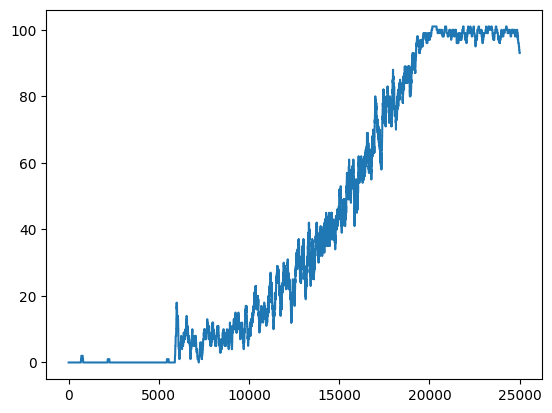

In [13]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt

def run(episodes, render=False):

    env = gym.make('FrozenLake-v1', map_name="8x8", is_slippery=False, render_mode='human' if render else None)

    
    q = np.zeros((env.observation_space.n, env.action_space.n)) # init a 64 x 4 array

    learning_rate_a = 0.9 # alpha or learning rate
    discount_factor_g = 0.99 # gamma or discount rate. Near 0: more weight/reward placed on immediate state. Near 1: more on future state.
    epsilon = 1         # 1 = 100% random actions
    epsilon_decay_rate = 0.00005 # means how fast the episilon decays over the episodes | epsilon_decay_rate = (epsilon - min_epsilon) / episodes
    min_epsilon = 0.01 # means the minimum value of epsilon it can drop to

    rewards_per_episode = np.zeros(episodes)

    for i in range(episodes):
        state = env.reset()[0]  # states: 0 to 63, 0=top left corner,63=bottom right corner
        terminated = False      # True when fall in hole or reached goal
        truncated = False       # True when actions > 200

        while not terminated and not truncated:
            if np.random.rand() < epsilon:
                action = env.action_space.sample()
            else:
                action = np.argmax(q[state])

            new_state,reward,terminated,truncated,_ = env.step(action)

            
            q[state,action] = q[state,action] + learning_rate_a * (reward + discount_factor_g * np.max(q[new_state,:]) - q[state,action])

            state = new_state

        epsilon = max(epsilon - epsilon_decay_rate, min_epsilon)

        if reward == 1:
            rewards_per_episode[i] = 1

            

    env.close()

    sum_rewards = np.zeros(episodes)
    for t in range(episodes):
        sum_rewards[t] = np.sum(rewards_per_episode[max(0, t-100):(t+1)])
    plt.plot(sum_rewards)


if __name__ == '__main__':
    run(25000)

    # run(1000, is_training=True, render=True)